# Final Project. An overall study on Superhosts & Superhost Prediction.

Link to presentation: https://www.canva.com/design/DAF1o5e4hac/p4vg9n4pTAu1oz_odwomKA/edit?utm_content=DAF1o5e4hac&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

*   100474498 Isabella Paul
*   100463488 Jinlin Lanz Wang
*   100474476 Nikole Valdez
*   100474280 Paola Castillo
*   100521187 Sebastian Myhr

The concept of SUPERHOST was created by Airbnb as a key indicator of exceptional service and guest satisfaction, and achieving this title could boost up your business as a host. For this reason, we have decided to: 

1. Firstly, answer the question of why would someone want to be a Superhost: Is there a real economical advantage to it?

2. Explore the main features such as aspects of the listing, behaviors of the host himself (response time, acceptance rate...) and what he offers. The goal of our EDA is to get a sense of what might make an impact to the attribution of the Superhost title. 

3. Building a model based on these variables in order to predict or identify Superhosts within **European cities**

3. Gathering our final conclusions and recommendations for potential Superhosts to achieve this Superhost status

## Initial assumptions and clarifications

1. Our decision to exclusively focus on big European cities stems from the fact that they tend to exhibit similarities in terms of market trends, consumer behaviors, and the hospitality industry's landscape. This homogeneity provides a more cohesive foundation for our modeling efforts, allowing us to draw meaningful insights and make relevant predictions that can be applied across them.

2. We have taken into account that, when you're a superhost, you get more people interested in staying at your place. This means more reviews are likely to come in. As you collect more positive reviews, it boosts your superhost status, attracting even more guests. This cycle repeats, with each step influencing the next, creating a continuous loop.

In [1]:
import pandas as pd
# listings = pd.read_csv('/Users/isagonzp/Desktop/big data/P3/home_rental_data/Amsterdam/listings.csv.gz',compression='gzip')
listings = pd.read_csv('./home_rental_data/Amsterdam/listings.csv.gz',compression='gzip')
listings

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,12690380,https://www.airbnb.com/rooms/12690380,20220907151523,2022-09-07,previous scrape,"Amsterdam, light big house 15 min from citycenter",We have a comfortable cosy house with a garden...,Green and quiet lots of playgrounds for kids o...,https://a0.muscache.com/pictures/a100d408-769c...,15032494,...,4.68,4.63,4.75,NaN,f,1,1,0,0,0.36
6889,15005354,https://www.airbnb.com/rooms/15005354,20220907151523,2022-09-07,previous scrape,Perfect family home near Amsterdam,Our house is situated in a quiet neighborhood ...,The house is situated in a beautiful neighbour...,https://a0.muscache.com/pictures/7a7d8058-c3f7...,46437958,...,5.00,4.89,4.83,NaN,f,1,1,0,0,0.26
6890,15171981,https://www.airbnb.com/rooms/15171981,20220907151523,2022-09-07,previous scrape,Child friendly house near Amsterdam - free par...,Lovely family house with beautiful garden in a...,"Located just outside of Amsterdam, in Duivendr...",https://a0.muscache.com/pictures/50ab12e8-c478...,96286859,...,4.71,4.30,4.50,NaN,f,1,1,0,0,0.29
6891,17567812,https://www.airbnb.com/rooms/17567812,20220907151523,2022-09-07,previous scrape,"Modern, spacious family home, 5 bedrooms-Amste...",Our house is located just 10 minutes away from...,"A very nice, quiet area, close to a park, fore...",https://a0.muscache.com/pictures/89bba873-f6c1...,55072916,...,5.00,4.75,4.88,NaN,f,1,1,0,0,0.12


In [2]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.893000e+03,6.893000e+03,6.893000e+03,6893.000000,6893.000000,0.0,6893.000000,6893.000000,6893.000000,0.0,...,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6893.000000,6893.000000,6893.000000,6893.000000,6247.000000
mean,1.039312e+17,2.022091e+13,9.626814e+07,2.625997,4.692732,NaN,52.365961,4.892367,2.983461,NaN,...,4.757246,4.881910,4.888492,4.778999,4.652211,1.938924,1.021471,0.802843,0.037719,1.304610
std,2.377222e+17,0.000000e+00,1.277327e+08,12.140930,28.586961,NaN,0.022094,0.041864,1.483226,NaN,...,0.317500,0.215967,0.225735,0.254663,0.299561,2.738912,1.417637,2.267227,0.421800,2.332563
min,2.818000e+03,2.022091e+13,3.159000e+03,1.000000,1.000000,NaN,52.268010,4.742430,0.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.407934e+07,2.022091e+13,9.426449e+06,1.000000,1.000000,NaN,52.355030,4.866710,2.000000,NaN,...,4.660000,4.850000,4.870000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.290000
50%,3.110072e+07,2.022091e+13,3.338184e+07,1.000000,1.000000,NaN,52.365870,4.888670,2.000000,NaN,...,4.850000,4.950000,4.970000,4.840000,4.690000,1.000000,1.000000,0.000000,0.000000,0.640000
75%,5.032563e+07,2.022091e+13,1.354875e+08,2.000000,3.000000,NaN,52.377040,4.911400,4.000000,NaN,...,5.000000,5.000000,5.000000,4.990000,4.830000,1.000000,1.000000,1.000000,0.000000,1.630000
max,7.099861e+17,2.022091e+13,4.783754e+08,446.000000,997.000000,NaN,52.442340,5.074204,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,21.000000,14.000000,21.000000,8.000000,104.110000


In [3]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

## Why to be a Superhost?
One may think that one relevant advantage of being a Superhost is being able to charge higher prices for their listings, due to better status level within the platform, in terms of guest assurance given the positive experiences shared by previous guests (reviews contribute to a sense of confidence and safety in choosing a property). 

In [4]:
import pandas as pd

# Assuming 'listings' is your DataFrame
# If your data is in a CSV file, you can read it like this:
# listings = pd.read_csv('your_file.csv')

# Remove non-numeric characters from the 'price' column and convert to float
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Now, 'price' is of type float in the 'listings' DataFrame

# If you want to create a new DataFrame with the changes, you can do the following:
listings2 = listings.copy()

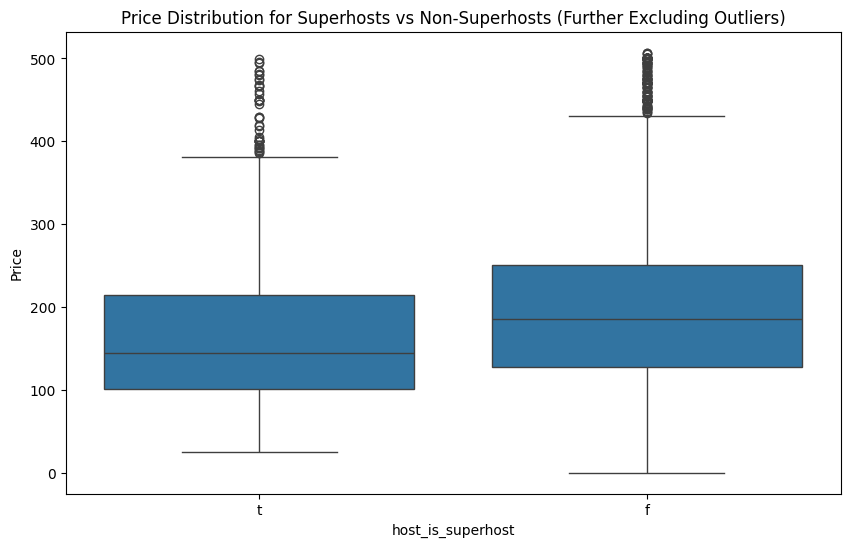

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'listings2' is your DataFrame
# Replace 'listings2' with the name of your actual DataFrame


# Remove outliers: keep only the ones that are within +2 to -2 standard deviations
std_dev = 1.5
mean_price = listings2['price'].mean()
std_price = listings2['price'].std()
filtered_listings_strict = listings2[(listings2['price'] > (mean_price - std_dev * std_price)) & 
                                    (listings2['price'] < (mean_price + std_dev * std_price))]

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='price', data=filtered_listings_strict)

# Set plot title and labels
plt.title('Price Distribution for Superhosts vs Non-Superhosts (Further Excluding Outliers)')
plt.ylabel('Price')

# Display the plot
plt.show()

In [6]:
import pandas as pd

# Assuming your DataFrame is named 'listings'
# Replace 'your_data.csv' with the actual file path or use your DataFrame directly

# Read your data into a DataFrame
# listings = pd.read_csv('your_data.csv')

# Calculate average price for each value of 'host_is_superhost'
average_price = listings.groupby('host_is_superhost')['price'].mean()

print(average_price)

host_is_superhost
f    224.339531
t    195.337546
Name: price, dtype: float64


In [7]:
import pandas as pd

# Assuming your DataFrame is named 'listings'
# Replace 'your_data.csv' with the actual file path or use your DataFrame directly

# Read your data into a DataFrame
# listings = pd.read_csv('your_data.csv')

# Calculate average price for each value of 'host_is_superhost'
median_price = listings.groupby('host_is_superhost')['price'].median()

print(median_price)

host_is_superhost
f    190.0
t    149.0
Name: price, dtype: float64


After observing the average pricing for Regular Hosts and Superhosts, we realized that our past assumption wasn't accurate. Generally speaking, Superhosts tend to charge a slighter lower price for their listings (the average price for a night of a Supehost listing is $195.34, in comparison to the $224.34 of Regular Hosts), and this may be related to the fact that Superhosts provide an outstanding **price-quality** ratio. Therefore, our next assumption could be that, given the lower prices, they are able to make a bigger volume of bookings. Since we do not possess any straightforward information about the number of bookings a host gets, we have taken the 'number_of_reviews' as an indicator of the amount of bookings they might have to find out whether our hypothesis stands. 

In [8]:
listings2=listings.dropna()

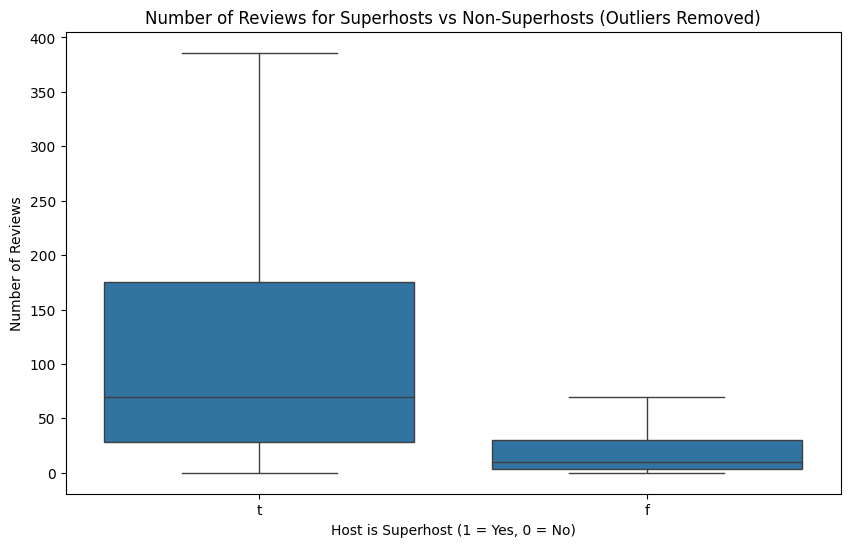

In [9]:
import matplotlib.pyplot as plt

# Create a boxplot without showing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='number_of_reviews', data=listings, showfliers=False)

# Set plot title and labels
plt.title('Number of Reviews for Superhosts vs Non-Superhosts (Outliers Removed)')
plt.xlabel('Host is Superhost (1 = Yes, 0 = No)')
plt.ylabel('Number of Reviews')

# Display the plot
plt.show()

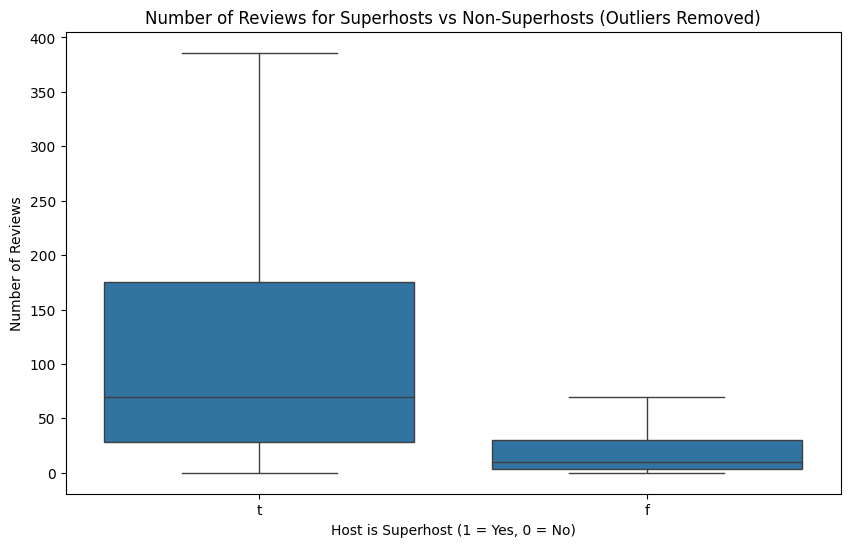

In [10]:
import matplotlib.pyplot as plt

# Create a boxplot without showing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='number_of_reviews', data=listings, showfliers=False)

# Set plot title and labels
plt.title('Number of Reviews for Superhosts vs Non-Superhosts (Outliers Removed)')
plt.xlabel('Host is Superhost (1 = Yes, 0 = No)')
plt.ylabel('Number of Reviews')

# Display the plot
plt.show()

To answer our initial question: **"Why to be a Superhost?"**, we could state that the main upside and differenciator of being a Superhost lies in the fact that they are able to close more bookings; hence, being able to be **more profitable** than Regular Hosts.

PS: More profitability, indeed, depends on incurred costs. We will presume that their cost structure is similar, onsidering that we were not provided with any information in that regard. 

## Data preprocessing

After first reading and reviewing all the data fields accompanied with their explanation, we found the following columns irrelevant to our analysis because they do not prove significant to the definition of a Superhost. Therefore, we proceeded to remove them.

In [11]:
# Variables we don't feel are relevant
columns_to_remove = [
    'last_scraped',
    'id', 
    'listing_url', 
    'scrape_id', 
    'name', 
    'picture_url', 
    'host_id', 
    'host_url',
    'host_name',
    'host_location',
    'host_thumbnail_url',
    'host_picture_url',
    'neighbourhood',
    'bathrooms',
    'calendar_updated',
    'calendar_last_scraped',
    'license',
    'bathrooms_text',
    'neighbourhood_group_cleansed'
]

# Drop the specified columns
listings = listings.drop(columns=columns_to_remove)

### Target variable: Initial Analysis
By doing an initial overview of our target variable: 'host_is_superhost', two main findings arise: 
1. t and f's were used to indicte whether we had a Superhost. Therefore, we decided to encode (to 1s and 0s) it for its usage for the model
2. Not all listings contain whether the host was a Superhost (Nan). 
3. One out of five hosts are Superhosts

In [12]:
listings.host_is_superhost.describe

<bound method NDFrame.describe of 0       t
1       f
2       f
3       t
4       t
       ..
6888    f
6889    f
6890    f
6891    f
6892    f
Name: host_is_superhost, Length: 6893, dtype: object>

In [13]:
# Encoding host_is_superhost
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)
listings_numeric = listings.select_dtypes(include=['number'])

In [14]:
missing_values = listings['host_is_superhost'].isnull().sum()
missing_values

0

In [15]:
import pandas as pd

# Exclude the value -1
listings_filtered = listings[listings['host_is_superhost'] != -1]

# Calculate the ratio
host_superhost_ratio = listings_filtered['host_is_superhost'].value_counts(normalize=True)

print("Host is Superhost Ratio (excluding -1):")
print(host_superhost_ratio)


Host is Superhost Ratio (excluding -1):
host_is_superhost
0    0.804648
1    0.195352
Name: proportion, dtype: float64


### Correlation analysis with host_is_superhost
After a first round of cleaning the aforementioned irrelevant fields, we have calculated their correlation with our target variable. The most correlated variables are (1) the number of reviews the listing gets, and (2) the review scores themselves. 

Initial assumptions:
(1) A review is assigned per booking. Thus, the more reviews a host receives, the more bookings have taken place.
(2) As expected, Superhosts tend to have higher review scores when it comes to cleanliness, check-in, communication, etc....

These will become the pillars of our model development, **(removing some fields that don't seem to have an impact on the model?)**

In [16]:
listings_numeric = listings.select_dtypes(include=['number'])

# Find the correlation with 'host_is_superhost'
correlation_with_superhost = listings_numeric.corr()['host_is_superhost']
sorted_correlation = correlation_with_superhost.sort_values(ascending=False)

# Display the correlation results
print(sorted_correlation)

host_is_superhost                               1.000000
number_of_reviews                               0.377057
number_of_reviews_ltm                           0.267319
number_of_reviews_l30d                          0.226005
reviews_per_month                               0.188400
review_scores_cleanliness                       0.155654
availability_365                                0.137581
availability_90                                 0.130927
review_scores_checkin                           0.113357
review_scores_rating                            0.108399
review_scores_value                             0.104298
review_scores_communication                     0.100496
review_scores_accuracy                          0.097465
review_scores_location                          0.078710
calculated_host_listings_count_private_rooms    0.073997
longitude                                       0.062426
availability_60                                 0.059161
maximum_nights                 

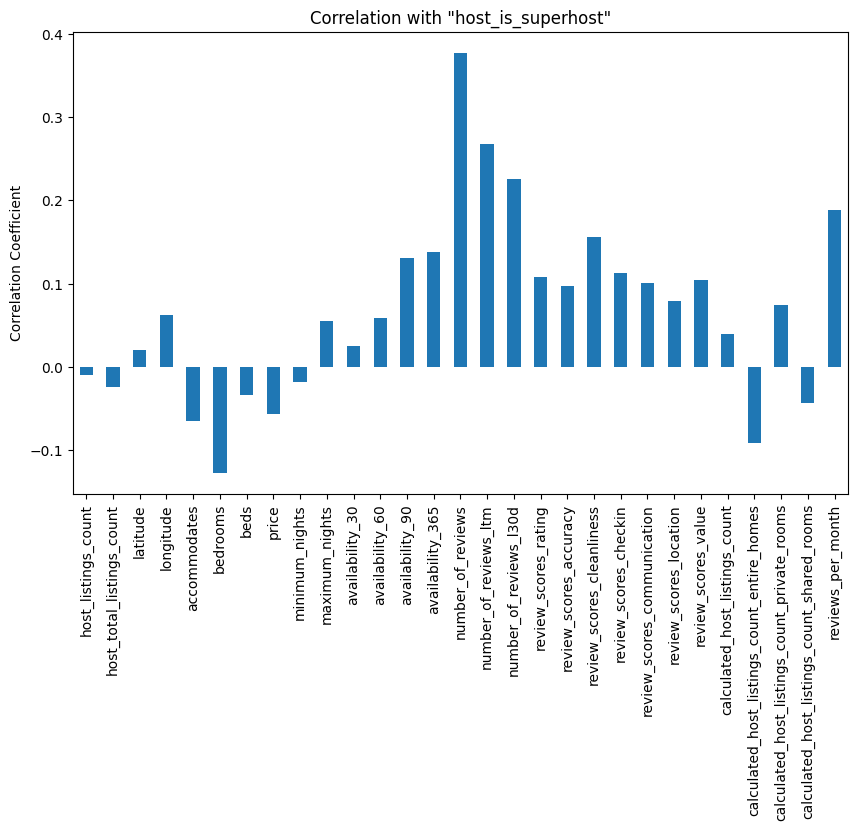

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt  # Correct import statement


columns_to_remove = [
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "has_availability"
]

listings_corr = listings.drop(columns=columns_to_remove, errors='ignore')

numeric_data = listings_corr.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
host_correlation = correlation_matrix['host_is_superhost']


plt.figure(figsize=(10, 6))
host_correlation.drop('host_is_superhost').plot(kind='bar')
plt.title('Correlation with "host_is_superhost"')
plt.ylabel('Correlation Coefficient')
plt.show()


In [18]:
# List of columns to remove with which we do not see much of a correlation
columns_to_remove = [
    "source",
    "neighborhood_overview",
    "host_neighborhood",
    "host_verifications",
    "neighborhood_cleansed",
    "neighborhood_group_cleansed",
    "room_type"
]

# Drop the specified columns
listings_filtered = listings.drop(columns=columns_to_remove, errors='ignore')

There is a series of categorical data that could play an important role when it comes to our main objective. The fact that the host has a profile picture gives the client more confidence to book the listing, the response time is crucial for a positive customer service feedback, and so on. 

In order to use the categorical data we find relevant for the further development of the model, we proceed to encode all the useful variables into numerical datatypes. We explain how we treated each of the cases below

In [19]:
import seaborn as sns
from datetime import datetime


# Some columns have true and false values that need to be encoded to 1 and 0, respectively 
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': -1}).fillna(-1).astype(int)
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)
listings['has_availability'] = listings['has_availability'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)

# Mapping host_response_time values to int
response_time_mapping = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3,
}

listings['host_response_time'] = listings['host_response_time'].map(response_time_mapping).fillna(-1).astype(int)

# Convert percentages to numerical values
listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# Remove dollar sign and convert price to numerical
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert datetime columns to days since that date from today's date instead
today_date = datetime.today()

listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['host_since'] = (today_date - listings['host_since']).dt.days

listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['first_review'] = (today_date - listings['first_review']).dt.days

listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['last_review'] = (today_date - listings['last_review']).dt.days

In [20]:
listings.dtypes

source                                           object
description                                      object
neighborhood_overview                            object
host_since                                        int64
host_about                                       object
host_response_time                                int64
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                 int64
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
host_verifications                               object
host_has_profile_pic                              int64
host_identity_verified                            int64
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       

## Ammenities Analysis
There is a categorical value of significant importance to treat: the Amenities listed by the host. We conceived the possibility of a relationship among the number of available ammenities listed and the likelihood of Superhosts offering more of them. Our findings on this would be valuable for later recommendations about how to become a SuperHost.

In [21]:
import pandas as pd
import ast  # to safely evaluate string literals

# Convert string lists to actual lists and extract unique amenities
unique_amenities = set()
for amenities_str in listings['amenities']:
    amenities_list = ast.literal_eval(amenities_str)  # safely evaluate the string as a list
    unique_amenities.update(amenities_list)

print(unique_amenities)

{'Aesop conditioner', 'Fast wifi – 230 Mbps', 'Nivea, Fa, Dove, or something similar conditioner', 'Clothing storage: dresser and closet', 'Logitech soudbar sound system with Bluetooth and aux', 'AC - split type ductless system', 'Complimentary continental breakfast', 'Orofluido shampoo', 'HDTV with Amazon Prime Video, Netflix, standard cable', 'Molton Brown body soap', 'Stella Maris body soap', 'Standalone high chair - always at the listing', 'Organic, different brands, also some Rituals. body soap', 'Hot water', 'Edison sound system with aux', '5" TV', 'Verschillend shampoo', 'AH conditioner', 'Smeg  stainless steel gas stove', 'TV with standard cable, Netflix, Chromecast', 'Nevea conditioner', 'Fast wifi – 239 Mbps', 'Organic  conditioner', 'Wifi – 48 Mbps', 'Fast wifi – 485 Mbps', 'Bike rental — €\xa016 per person per day', 'Clothing storage: wardrobe, walk-in closet, and dresser', 'Divers oven', 'Fast wifi – 281 Mbps', 'Nivea  body soap', '65" HDTV with Amazon Prime Video, Netflix

In [22]:
unique_amenities = set().union(*listings['amenities'])
count_unique_amenities = len(unique_amenities)

print(f"Total unique amenities: {count_unique_amenities}")


Total unique amenities: 82


In [23]:
# We need to convert data that is in object form to numeric

# Amenities for non superhosts
nosuperhost_listings= listings[listings['host_is_superhost'] == 0]

# Amenities for superhosts
superhost_listings = listings[listings['host_is_superhost'] == 1]
listings

,source,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,city scrape,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",5555,"Upon arriving in Amsterdam, one can imagine as...",0,1.00,1.00,1,Indische Buurt,...,4.97,4.98,4.69,4.82,1,1,0,1,0,1.86
1,previous scrape,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,5121,+ (Phone number hidden by Airbnb),0,1.00,0.98,0,Grachtengordel,...,4.63,4.62,4.87,4.49,1,2,0,2,0,2.22
2,city scrape,Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",5010,"Marjan works in ""eye"" the dutch filmmuseum, an...",0,1.00,1.00,0,Westelijke Eilanden,...,4.95,4.92,4.89,4.79,1,1,0,1,0,1.78
3,city scrape,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",4959,Hi,0,1.00,1.00,1,Amsterdam Centrum,...,4.96,4.94,4.96,4.83,0,2,0,2,0,2.92
4,city scrape,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,4959,Hi,0,1.00,1.00,1,Amsterdam Centrum,...,4.92,4.92,4.87,4.77,0,2,0,2,0,4.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,previous scrape,We have a comfortable cosy house with a garden...,Green and quiet lots of playgrounds for kids o...,3508,NaN,1,1.00,1.00,0,NaN,...,4.83,4.68,4.63,4.75,0,1,1,0,0,0.36
6889,previous scrape,Our house is situated in a quiet neighborhood ...,The house is situated in a beautiful neighbour...,2980,NaN,0,0.67,0.50,0,NaN,...,4.83,5.00,4.89,4.83,0,1,1,0,0,0.26
6890,previous scrape,Lovely family house with beautiful garden in a...,"Located just outside of Amsterdam, in Duivendr...",2635,NaN,0,1.00,1.00,0,NaN,...,4.75,4.71,4.30,4.50,0,1,1,0,0,0.29
6891,previous scrape,Our house is located just 10 minutes away from...,"A very nice, quiet area, close to a park, fore...",2883,NaN,3,0.00,0.00,0,NaN,...,5.00,5.00,4.75,4.88,0,1,1,0,0,0.12


Inspecting the most frequent amenities within Superhosts, we reduced them to the top 10 (excluding 'essentials', given the ambiguity of the field) and assigned a value of 1 for each one. We iterate through the amenties in each listing and add the ones that the listing has for a total score out of 10, which means a host has all of the amenities we selected.

In [24]:
import pandas as pd

# Assuming your DataFrame is named 'superhost_listings' and the column is named 'amenities'
# Replace 'superhost_listings' and 'amenities' with your actual DataFrame and column names

# List of keywords to check for
keywords = ['Smoke alarm', 'Hair dryer', 'Hot water', 'Hangers', 'Wifi', 'Heating', 'Coffee maker', 'Dishes and silverware', 'Bed Linens', 'Refrigerator']

# Create a new column 'amenities_score' and set default value to 0
listings['amenities_score'] = 0

# Iterate through each keyword and add 1 to 'amenities_score' if keyword is found
for keyword in keywords:
    listings['amenities_score'] = listings['amenities_score'] + listings['amenities'].str.contains(keyword, case=False)

# You can convert the boolean values to integers (0 or 1) if needed
listings['amenities_score'] = listings['amenities_score'].astype(int)




superhost_listings['amenities_score'] = 0

# Iterate through each keyword and add 1 to 'amenities_score' if keyword is found
for keyword in keywords:
    superhost_listings['amenities_score'] = superhost_listings['amenities_score'] + superhost_listings['amenities'].str.contains(keyword, case=False)

# You can convert the boolean values to integers (0 or 1) if needed
superhost_listings['amenities_score'] = superhost_listings['amenities_score'].astype(int)



nosuperhost_listings['amenities_score'] = 0

# Iterate through each keyword and add 1 to 'amenities_score' if keyword is found
for keyword in keywords:
    nosuperhost_listings['amenities_score'] = nosuperhost_listings['amenities_score'] + nosuperhost_listings['amenities'].str.contains(keyword, case=False)

# You can convert the boolean values to integers (0 or 1) if needed
nosuperhost_listings['amenities_score'] = nosuperhost_listings['amenities_score'].astype(int)


/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/1413242725.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['amenities_score'] = 0
/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/1413242725.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['amenities_score'] = superhost_listings['amenities_score'] + superhost_listings['amenities'].str.contains(keyword, case=False)
/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/1

In [25]:
# Assuming your DataFrame is named 'superhost_listings'
# Replace 'superhost_listings' with your actual DataFrame name

# Count the occurrences of each unique value in the 'amenities_score' column
score_counts = listings['amenities_score'].value_counts()

# Calculate the percentage of each score
score_percentages = score_counts / score_counts.sum() * 100

# Print the percentages
print('TOTAL LISTING AMEN-SCORE PERCENTAGE')
print(score_percentages)


TOTAL LISTING AMEN-SCORE PERCENTAGE
amenities_score
10    32.801393
9     21.848252
8     13.201799
7      7.137676
5      5.933556
6      5.788481
2      4.294212
4      4.279704
3      3.409256
1      1.088060
0      0.217612
Name: count, dtype: float64


In [26]:
# Assuming your DataFrame is named 'superhost_listings'

# Count the occurrences of each unique value in the 'amenities_score' column
score_counts = superhost_listings['amenities_score'].value_counts()

# Calculate the percentage of each score
score_percentages = score_counts / score_counts.sum() * 100

# Print the percentages
print('SUPER-HOST LISTING AMEN-SCORE PERCENTAGE')
print(score_percentages)


SUPER-HOST LISTING AMEN-SCORE PERCENTAGE
amenities_score
10    48.401487
9     23.940520
8     12.490706
7      5.873606
6      3.791822
5      2.973978
4      1.040892
3      0.743494
2      0.594796
0      0.074349
1      0.074349
Name: count, dtype: float64


In [27]:
score_counts = nosuperhost_listings['amenities_score'].value_counts()

# Calculate the percentage of each score
score_percentages = score_counts / score_counts.sum() * 100

# Print the percentages
print('NON-SUPERHOST LISTING AMEN-SCORE PERCENTAGE')
print(score_percentages)


NON-SUPERHOST LISTING AMEN-SCORE PERCENTAGE
amenities_score
10    29.061372
9     21.371841
8     13.375451
7      7.454874
5      6.606498
6      6.245487
2      5.180505
4      5.054152
3      4.061372
1      1.335740
0      0.252708
Name: count, dtype: float64


Here we see from the analysis that superhosts have a higher percentage of 10 scores, in addition to 9s. In general, we see that superhosts amenities scores are weighted higher. The difference is especially noticeable with 10s. We conclude that superhosts tend to provide more of these amenities, or perhaps are more detailed and list out more amenities that they have. 

In [28]:
unique_column_names = listings.columns.tolist()

# Display unique column names
print(unique_column_names)

['source', 'description', 'neighborhood_overview', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_locat

## Description Analysis
Another interesting category for our analysis is the description field that Airbnb provides to give a more detailed and closer explanation of the listing. Our assumption is: the more detailed and extense, the more attracted the clients will be to the host's listings.

### Average Word Count - Superhosts

In [29]:
listings['word_count'] = listings['description'].apply(lambda x: len(str(x).split()))

# Filter the DataFrame to include only rows where 'host_is_superhost' is equal to 1
superhost_listings = listings[listings['host_is_superhost'] == 1]

# Calculate the average word count for the selected rows
average_word_count_superhost = superhost_listings['word_count'].mean()

# Display the average word count for the selected rows
print("Average Word Count for Superhosts:", average_word_count_superhost)

Average Word Count for Superhosts: 143.69442379182155


### Average Word Count - Regular Hosts

In [30]:
listings['word_count'] = listings['description'].apply(lambda x: len(str(x).split()))

# Filter the DataFrame to include only rows where 'host_is_superhost' is equal to 1
superhost_listings = listings[listings['host_is_superhost'] == 0]

# Calculate the average word count for the selected rows
average_word_count_superhost = superhost_listings['word_count'].mean()

# Display the average word count for the selected rows
print("Average Word Count for Non-Superhosts:", average_word_count_superhost)

Average Word Count for Non-Superhosts: 127.32924187725632


As seen, SuperHost provide longer descriptions than regular hosts. This confirms our previously stated hyphotesis, and we will take it into account for the recommendations section. 

### Most frequent words between Superhosts


Now, we have analysed the SuperHost descriptions in order to find out which words are the most repeated, as those may serve us as an indicator of how SuperHost communicate with potential customers (degree of human warmth and closeness). Thus, we could use this information in the latter recommendations section.

In [31]:
from collections import Counter
import pandas as pd

# Create a new column 'word_count' in the DataFrame to store the word count for each description
listings['word_count'] = listings['description'].apply(lambda x: len(str(x).split()))

# Filter out rows where the word count is less than 3
filtered_listings = listings[listings['word_count'] > 4]

# Combine all descriptions into a single string
all_descriptions = ' '.join(filtered_listings['description'])

# Tokenize the combined string into words
words = all_descriptions.split()

# Exclude words with fewer than 4 letters
min_word_length = 4
filtered_words = [word for word in words if len(word) >= min_word_length]

# Count the occurrences of each filtered word
word_counts = Counter(filtered_words)

# Sort the words based on their occurrences in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Display the most repeated words
print("Most Repeated Words (excluding words with less than 4 letters):")
for word, count in sorted_word_counts.items():
    print(f"{word}: {count}")

Most Repeated Words (excluding words with less than 4 letters):
/><br: 19532
with: 14583
apartment: 6623
space</b><br: 5059
/><b>The: 4880
/>The: 4560
room: 4260
Amsterdam: 4177
from: 4050
have: 3531
your: 3349
number</b><br: 3185
/><b>License: 3141
will: 3080
house: 3061
living: 3037
located: 2763
city: 2729
kitchen: 2616
bathroom: 2575
/>0363: 2556
very: 2462
bedroom: 2398
floor: 2379
/><b>Guest: 2264
access</b><br: 2239
private: 2178
spacious: 2116
minutes: 2085
area: 1917
this: 1878
large: 1671
that: 1668
place: 1663
Amsterdam.: 1617
double: 1590
beautiful: 1571
nice: 1567
quiet: 1550
comfortable: 1539
equipped: 1520
also: 1497
walking: 1469
things: 1448
just: 1442
This: 1441
fully: 1429
walk: 1337
/><b>Other: 1337
great: 1337
stay: 1330
open: 1290
enjoy: 1285
there: 1284
close: 1284
note</b><br: 1281
There: 1261
garden: 1253
which: 1240
modern: 1209
find: 1207
perfect: 1191
small: 1125
center: 1101
where: 1091
only: 1065
centre: 1053
around: 1053
home: 1052
kitchen,: 1048
restaura

In [32]:
from collections import Counter
import re

# Assume 'listings' DataFrame is already defined

# Create a new column 'word_count' in the DataFrame to store the word count for each description
listings['word_count'] = listings['description'].apply(lambda x: len(str(x).split()))

# Filter out rows where the word count is less than 3
filtered_listings = listings[listings['word_count'] > 4]

# Combine all descriptions into a single string
all_descriptions = ' '.join(filtered_listings['description'])

# Tokenize the combined string into words
words = re.findall(r'\b\w+\b', all_descriptions)

# Exclude words with fewer than 4 letters and specific patterns
min_word_length = 4
filtered_words = [word for word in words if len(word) >= min_word_length and '/><' not in word]

# Count the occurrences of each filtered word
word_counts = Counter(filtered_words)

# Sort the words based on their occurrences in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Display the most repeated words
print("Most Repeated Words (excluding words with less than 4 letters and specific patterns):")
for word, count in sorted_word_counts.items():
    print(f"{word}: {count}")

Most Repeated Words (excluding words with less than 4 letters and specific patterns):
with: 14854
Amsterdam: 8289
apartment: 7845
space: 6421
room: 5946
kitchen: 4395
house: 4263
from: 4113
bathroom: 3757
floor: 3634
city: 3604
have: 3558
your: 3361
access: 3313
living: 3305
number: 3303
bedroom: 3280
License: 3235
will: 3085
area: 3044
located: 2938
0363: 2621
minutes: 2543
very: 2484
spacious: 2356
private: 2347
Guest: 2327
This: 2213
garden: 2108
place: 2026
restaurants: 2007
There: 1975
stay: 1939
this: 1931
shower: 1875
walk: 1856
equipped: 1813
quiet: 1797
that: 1784
toilet: 1772
large: 1736
center: 1733
centre: 1696
comfortable: 1695
home: 1679
double: 1673
beautiful: 1665
nice: 1644
note: 1583
walking: 1570
bedrooms: 1547
balcony: 1541
also: 1540
fully: 1526
there: 1515
distance: 1488
things: 1481
just: 1454
open: 1388
great: 1383
Other: 1371
enjoy: 1340
modern: 1332
close: 1331
view: 1295
which: 1268
renovated: 1237
light: 1226
perfect: 1226
terrace: 1224
find: 1219
street: 12

##  Property type
The objective of this next analysis is to get an insight of what type of properties are more offered within Superhosts in contrast with their fellow regular hosts

In [33]:
#property type analysis
import pandas as pd

# Display unique values in the 'property_type' column
unique_property_types = listings['property_type'].unique()
print("Unique Property Types:")
print(unique_property_types)

# Display a summary of the 'property_type' column
property_type_summary = listings['property_type'].value_counts()
print("\nProperty Type Summary:")
print(property_type_summary)

# Display basic statistics of the 'property_type' column
property_type_stats = listings['property_type'].describe()
print("\nProperty Type Statistics:")
print(property_type_stats)

Unique Property Types:
['Private room in rental unit' 'Private room in townhouse'
 'Private room in houseboat' 'Entire rental unit' 'Entire guest suite'
 'Private room in bed and breakfast' 'Entire loft' 'Private room in home'
 'Entire guesthouse' 'Private room in boat' 'Entire townhouse'
 'Room in boutique hotel' 'Entire condo' 'Private room in loft'
 'Private room in guest suite' 'Entire home' 'Boat'
 'Private room in farm stay' 'Houseboat' 'Room in bed and breakfast'
 'Private room in condo' 'Entire chalet' 'Private room in guesthouse'
 'Shared room in rental unit' 'Shared room in home'
 'Private room in island' 'Entire villa' 'Private room in villa'
 'Private room in tiny home' 'Private room in casa particular'
 'Entire serviced apartment' 'Barn' 'Private room in bungalow'
 'Entire cabin' 'Room in hotel' 'Entire place'
 'Private room in serviced apartment' 'Room in aparthotel' 'Tiny home'
 'Private room in cabin' 'Entire cottage' 'Private room'
 'Private room in nature lodge' 'Room

In [34]:
import pandas as pd

# Define a function to categorize property types
def categorize_property_type(property_type):
    if 'entire' in property_type.lower():
        return 'Entire Place'
    elif 'private room' in property_type.lower():
        return 'Private Room'
    elif 'shared room' in property_type.lower():
        return 'Shared Room'
    elif 'boat' in property_type.lower() or 'houseboat' in property_type.lower():
        return 'Boat/Houseboat'
    # Add more conditions based on your specific categories

    # If none of the conditions match, return the original value
    return property_type

# Apply the categorization function to the 'property_type' column
listings['property_type_category'] = listings['property_type'].apply(categorize_property_type)

# Display the unique values in the new 'property_type_category' column
unique_property_type_categories = listings['property_type_category'].unique()
print("Unique Property Type Categories:")
print(unique_property_type_categories)

# Display a summary of the counts for each unique category
property_type_category_summary = listings['property_type_category'].value_counts()
print("\nProperty Type Category Summary:")
print(property_type_category_summary)

Unique Property Type Categories:
['Private Room' 'Entire Place' 'Room in boutique hotel' 'Boat/Houseboat'
 'Room in bed and breakfast' 'Shared Room' 'Barn' 'Room in hotel'
 'Room in aparthotel' 'Tiny home' 'Room in serviced apartment' 'Tower'
 'Room in casa particular' 'Room in hostel' 'Camper/RV' 'Cave' 'Yurt'
 'Farm stay' 'Windmill' 'Tent']

Property Type Category Summary:
property_type_category
Entire Place                  4653
Private Room                  1620
Boat/Houseboat                 212
Room in boutique hotel         148
Room in hotel                   93
Shared Room                     37
Room in aparthotel              34
Room in bed and breakfast       26
Tiny home                       18
Room in serviced apartment      16
Room in hostel                  12
Farm stay                        8
Barn                             4
Camper/RV                        4
Tower                            3
Room in casa particular          1
Cave                             1
Yurt

/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/2375268470.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='property_type_category', y='counts', data=grouped_data[grouped_data['host_is_superhost'] == 1], order=order_superhosts, palette='husl')
/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/2375268470.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='property_type_category', y='counts', data=grouped_data[grouped_data['host_is_superhost'] == 0], order=order_normal_hosts, palette='husl')


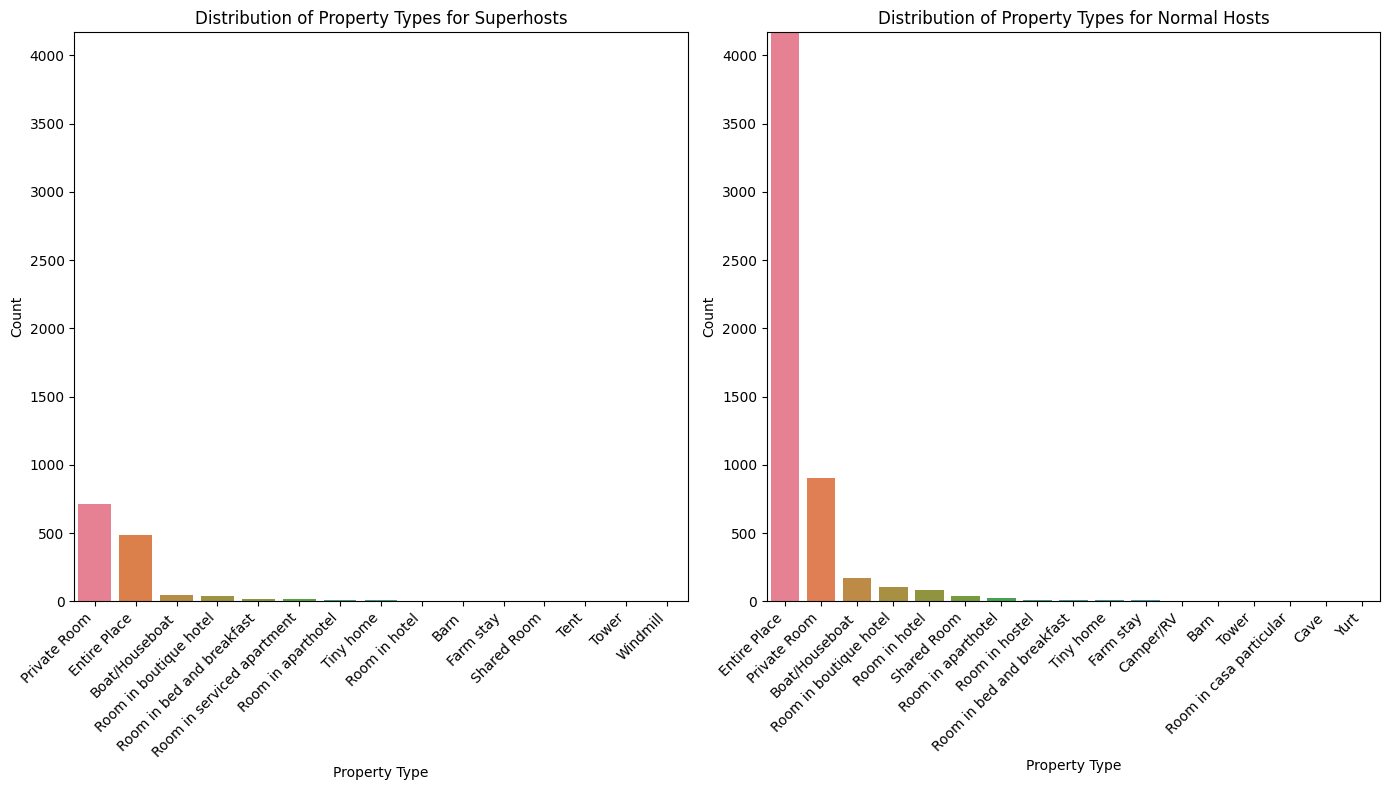

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'host_is_superhost' and 'property_type_category' and count occurrences
grouped_data = listings.groupby(['host_is_superhost', 'property_type_category']).size().reset_index(name='counts')

# Order property types by frequency for both superhosts and normal hosts
order_superhosts = grouped_data[grouped_data['host_is_superhost'] == 1].groupby('property_type_category')['counts'].sum().sort_values(ascending=False).index
order_normal_hosts = grouped_data[grouped_data['host_is_superhost'] == 0].groupby('property_type_category')['counts'].sum().sort_values(ascending=False).index

# Get the maximum count to set a shared y-axis limit
max_count = max(grouped_data['counts'])

# Create bar plots for superhosts and normal hosts with the same y-axis limit
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.barplot(x='property_type_category', y='counts', data=grouped_data[grouped_data['host_is_superhost'] == 1], order=order_superhosts, palette='husl')
plt.title('Distribution of Property Types for Superhosts')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max_count)  # Set shared y-axis limit

plt.subplot(1, 2, 2)
sns.barplot(x='property_type_category', y='counts', data=grouped_data[grouped_data['host_is_superhost'] == 0], order=order_normal_hosts, palette='husl')
plt.title('Distribution of Property Types for Normal Hosts')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max_count)  # Set shared y-axis limit

plt.tight_layout()
plt.show()

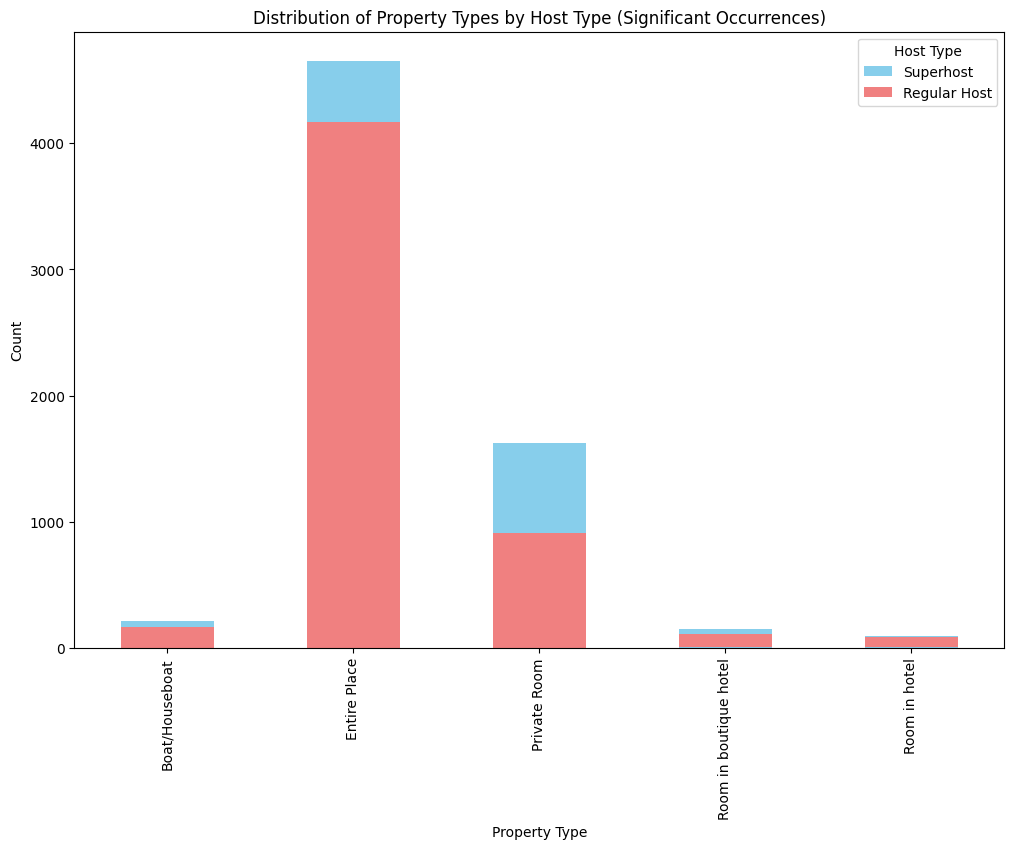

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the threshold for the minimum number of occurrences for a property type to be considered
min_occurrences = 50

# Filter property types that appear a significant amount of times
filtered_property_types = listings['property_type_category'].value_counts()[listings['property_type_category'].value_counts() >= min_occurrences].index

# Filter the DataFrame based on the selected property types
df_filtered = listings[listings['property_type_category'].isin(filtered_property_types)]

# Group by 'host_is_superhost' and 'property_type_category' and count occurrences
grouped_data = df_filtered.groupby(['host_is_superhost', 'property_type_category']).size().reset_index(name='counts')

# Pivot the table for better visualization
pivot_table = grouped_data.pivot(index='property_type_category', columns='host_is_superhost', values='counts').fillna(0)

# Plotting a bar chart for the distribution
colors = ['skyblue', 'lightcoral']
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Distribution of Property Types by Host Type (Significant Occurrences)')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.legend(title='Host Type', labels=['Superhost', 'Regular Host'])
plt.show()

As seen on the previously shown graphs, the tendency is that Superhosts to list a higher amount of Private Rooms, in comparison to Entire places. The reasoning behind this distribution would require further investigation given that it is subject to a vast amount of external factors such as the countries' urban planning, market tendencies, and these results (Amsterdam's) might not be represantitve or generalized to other European cities. 

## Response Time Analysis
It is natural to think that Superhosts are more likely to be faster when it comes to contacting their clients; this is because being attentive and providing a quick service has a great impact on customer satisfaction. In this section, we will use the data provided in order to confirm or discard this assumption.

0 = within an hour
1 = within a few hours
2 = within a day
3 = a few days or more

/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/2657144323.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_time_counts_superhost.index, y=response_time_counts_superhost.values, palette='husl')


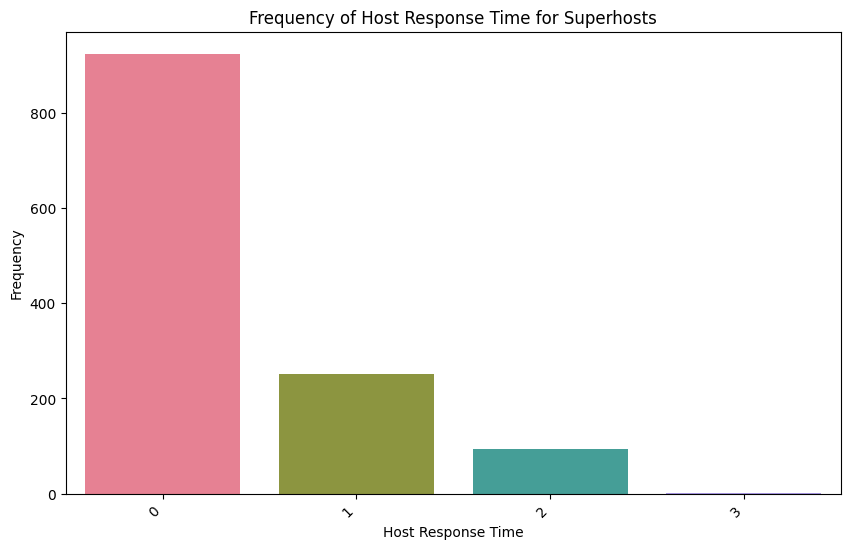

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'listings' DataFrame is already defined

# Filter rows where 'host_is_superhost' is equal to 1 and 'host_response_time' is not equal to -1
superhost_data = listings[(listings['host_is_superhost'] == 1) & (listings['host_response_time'] != -1)]

# Count the frequency of each unique value in 'host_response_time' for superhosts
response_time_counts_superhost = superhost_data['host_response_time'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=response_time_counts_superhost.index, y=response_time_counts_superhost.values, palette='husl')
plt.title('Frequency of Host Response Time for Superhosts')
plt.xlabel('Host Response Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/wg/gj55st8j4mg2z1nyvbprtsjh0000gn/T/ipykernel_80225/3559510975.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_time_counts_superhost.index, y=response_time_counts_superhost.values, palette='husl')


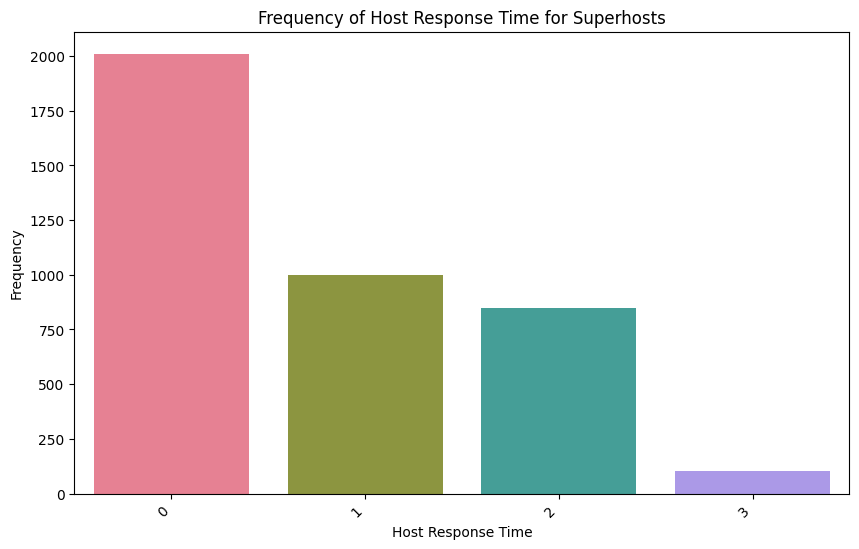

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'listings' DataFrame is already defined

# Filter rows where 'host_is_superhost' is equal to 1 and 'host_response_time' is not equal to -1
superhost_data = listings[(listings['host_is_superhost'] == 0) & (listings['host_response_time'] != -1)]

# Count the frequency of each unique value in 'host_response_time' for superhosts
response_time_counts_superhost = superhost_data['host_response_time'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=response_time_counts_superhost.index, y=response_time_counts_superhost.values, palette='husl')
plt.title('Frequency of Host Response Time for Regular Hosts')
plt.xlabel('Host Response Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.show()

As we can observe, our assumption was correct. Even though the most frequent response time for both types of hosts is less than an hour, there are more Regular hosts that take longer to respond to their clients. This is related to the aim of Superhosts to provide the highest quality service and provide the best experience for their customers.

## Review Score Analysis

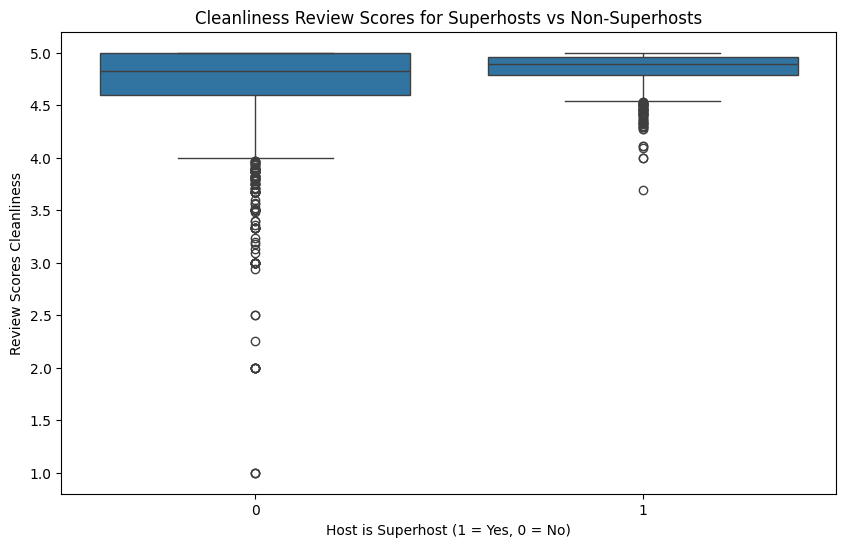

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'listings' is your DataFrame
# Replace -1 with NaN to represent missing or undefined values
listings['host_is_superhost'] = listings['host_is_superhost'].replace(-1, pd.NA)

# Filter out rows where 'host_is_superhost' is not NaN
filtered_listings = listings.dropna(subset=['host_is_superhost'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_cleanliness', data=filtered_listings)

# Set plot title and labels
plt.title('Cleanliness Review Scores for Superhosts vs Non-Superhosts')
plt.xlabel('Host is Superhost (1 = Yes, 0 = No)')
plt.ylabel('Review Scores Cleanliness')

# Display the plot
plt.show()


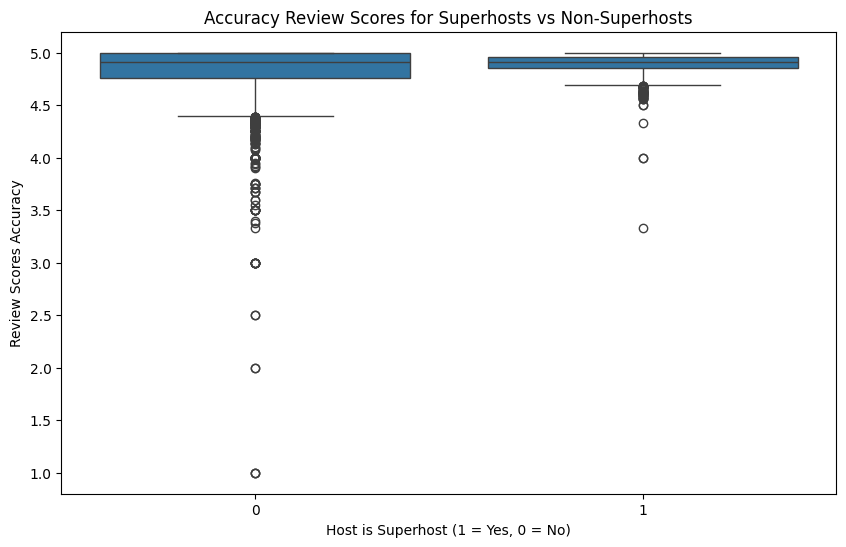

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

listings['host_is_superhost'] = listings['host_is_superhost'].replace(-1, pd.NA)

filtered_listings = listings.dropna(subset=['host_is_superhost'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_accuracy', data=filtered_listings)

# Set plot title and labels
plt.title('Accuracy Review Scores for Superhosts vs Non-Superhosts')
plt.xlabel('Host is Superhost (1 = Yes, 0 = No)')
plt.ylabel('Review Scores Accuracy')

# Display the plot
plt.show()


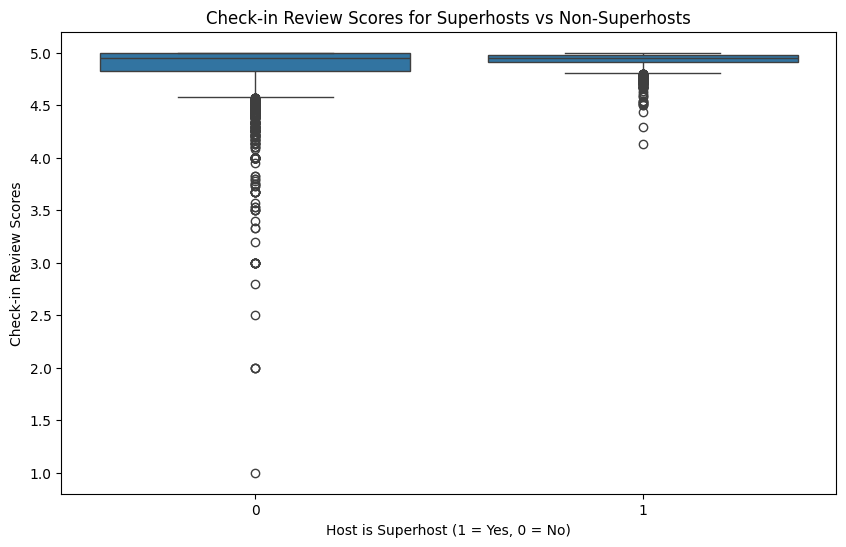

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

listings['host_is_superhost'] = listings['host_is_superhost'].replace(-1, pd.NA)

filtered_listings = listings.dropna(subset=['host_is_superhost'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_checkin', data=filtered_listings)

# Set plot title and labels
plt.title('Check-in Review Scores for Superhosts vs Non-Superhosts')
plt.xlabel('Host is Superhost (1 = Yes, 0 = No)')
plt.ylabel('Check-in Review Scores')

# Display the plot
plt.show()

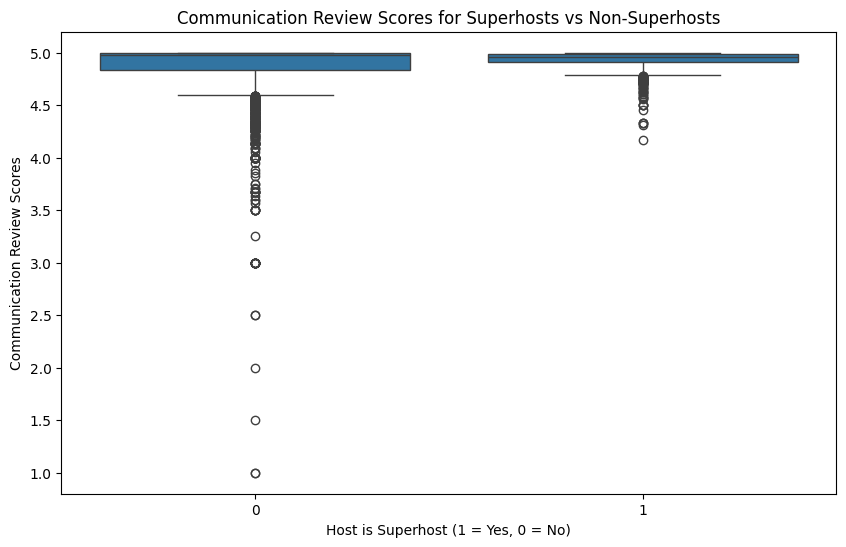

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

listings['host_is_superhost'] = listings['host_is_superhost'].replace(-1, pd.NA)

filtered_listings = listings.dropna(subset=['host_is_superhost'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='review_scores_communication', data=filtered_listings)

# Set plot title and labels
plt.title('Communication Review Scores for Superhosts vs Non-Superhosts')
plt.xlabel('Host is Superhost (1 = Yes, 0 = No)')
plt.ylabel('Communication Review Scores')

# Display the plot
plt.show()

# Building a Model to Predict if a listing is Superhost

In [39]:
# Remove the "word count" column
listings = listings.drop(columns=['word_count'])

# Clean Data for only numeric types for model
numeric_list = listings.select_dtypes(include='number')
listings_numeric_cleaned = numeric_list.dropna()
# listings_numeric_amenities = listings_numeric_cleaned.drop(['listing amen'], axis=1)
listings_numeric_cleaned = listings_numeric_cleaned.drop(['amenities_score'], axis=1)

In [40]:
# Random Forest Model
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score

# X represents the features, and y represents the target variable
X = listings_numeric_cleaned.drop('host_is_superhost', axis=1)
y = listings_numeric_cleaned['host_is_superhost']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Use SimpleImputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the imputed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the model
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Gradient Boost Model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

# Use SimpleImputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the imputed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics
gb_accuracy = accuracy_score(y_test, y_pred)
gb_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)

In [43]:
# Print the results

print('Random Forest Model')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'balanced_accuracy: {rf_balanced_accuracy:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')

print('\nLogistic Regression Model')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'balanced_accuracy: {lr_balanced_accuracy:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')

print('\nGradient Boost Model')
print(f'Accuracy: {gb_accuracy:.4f}')
print(f'balanced_accuracy: {gb_balanced_accuracy:.4f}')
print(f'Precision: {gb_precision:.4f}')
print(f'Recall: {gb_recall:.4f}')


Random Forest Model
Accuracy: 0.8831
balanced_accuracy: 0.8142
Precision: 0.8634
Recall: 0.6667

Logistic Regression Model
Accuracy: 0.7427
balanced_accuracy: 0.5236
Precision: 0.7222
Recall: 0.0549

Gradient Boost Model
Accuracy: 0.8888
balanced_accuracy: 0.8341
Precision: 0.8416
Recall: 0.7173


In [44]:
# Function to test model on any city
# Set sample to -1 to use entire dataset, otherwise it represents the sample size

def modelTest(city, sample):
    
    filepath = './home_rental_data/' + city + '/listings.csv.gz'
    if city == 'Zurich':
        filepath = './home_rental_data/' + city + '/listings .csv.gz'

    city_listing = pd.read_csv(filepath, compression='gzip')

    # Variables we don't feel are relevant
    columns_to_remove = [
        'last_scraped',
        'id', 
        'listing_url', 
        'scrape_id', 
        'name', 
        'picture_url', 
        'host_id', 
        'host_url',
        'host_name',
        'host_location',
        'host_thumbnail_url',
        'host_picture_url',
        'neighbourhood',
        'bathrooms',
        'calendar_updated',
        'calendar_last_scraped',
        'license',
        'bathrooms_text',
        'neighbourhood_group_cleansed'
    ]

    # Drop the specified columns
    city_listing = city_listing.drop(columns=columns_to_remove)

    # Some columns have true and false values that need to be encoded to 1 and 0, respectively 
    city_listing['host_has_profile_pic'] = city_listing['host_has_profile_pic'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)
    city_listing['host_identity_verified'] = city_listing['host_identity_verified'].map({'t': 1, 'f': -1}).fillna(-1).astype(int)
    city_listing['instant_bookable'] = city_listing['instant_bookable'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)
    city_listing['has_availability'] = city_listing['has_availability'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)
    city_listing['host_is_superhost'] = city_listing['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(-1).astype(int)

    # Mapping host_response_time values to int
    response_time_mapping = {
        'within an hour': 0,
        'within a few hours': 1,
        'within a day': 2,
        'a few days or more': 3,
    }

    city_listing['host_response_time'] = city_listing['host_response_time'].map(response_time_mapping).fillna(-1).astype(int)

    # Convert percentages to numerical values
    city_listing['host_response_rate'] = city_listing['host_response_rate'].str.rstrip('%').astype('float') / 100.0
    city_listing['host_acceptance_rate'] = city_listing['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

    # Remove dollar sign and convert price to numerical
    city_listing['price'] = city_listing['price'].replace('[\$,]', '', regex=True).astype(float)

    # Convert datetime columns to days since that date from today's date instead
    today_date = datetime.today()

    city_listing['host_since'] = pd.to_datetime(city_listing['host_since'])
    city_listing['host_since'] = (today_date - city_listing['host_since']).dt.days

    city_listing['first_review'] = pd.to_datetime(city_listing['first_review'])
    city_listing['first_review'] = (today_date - city_listing['first_review']).dt.days

    city_listing['last_review'] = pd.to_datetime(city_listing['last_review'])
    city_listing['last_review'] = (today_date - city_listing['last_review']).dt.days

    city_numeric_list = city_listing.select_dtypes(include='number')
    city_listing_numeric_cleaned = city_numeric_list.dropna()

    
    if sample == -1:
        random_city_listing = city_listing_numeric_cleaned
    else:
        random_city_listing = city_listing_numeric_cleaned.sample(n=sample, random_state=42)
    
    # Select the features from random_city_listing
    new_data_features = random_city_listing.drop('host_is_superhost', axis=1)

    # Make predictions on the new dataset
    new_data_predictions = rf_classifier.predict(new_data_features)

    accuracy = accuracy_score(random_city_listing['host_is_superhost'], new_data_predictions)

    return accuracy

In [45]:
# Testing the Model on various cities
 
cities = ['Barcelona', 'Milan', 'Tokyo', 'Valencia', 'Geneva', 'Rotterdam', 'Mexico City', 'Los Angeles', 'Euskadi']

for city in cities:
    print(city, ': ', "{:.2f}".format(modelTest(city, 400)))

Barcelona :  0.86
Milan :  0.81
Tokyo :  0.74
Valencia :  0.86
Geneva :  0.85
Rotterdam :  0.82
Mexico City :  0.71
Los Angeles :  0.72
Euskadi :  0.75


To assess the model we have chosen the accuracy score, given that our main goal is to check on its overall performance. Overall, we are very pleased with the outcome, proving itself **successful** as we have achieved an 80 to 89% accuracy within big European cities, in conttrast to an average of 70% within other regions around the world. This means that the factors we have taken into account on the EDA have been useful and of great significance within the prediction of who's to be a Superhost

## Conclusions 
Our exploratory analysis and research have shown that there are indeed benefits associated with the acuisition of the title Airbnb Supehost since the exposure leads them to acquire  a higher volume of bookings. We can also affirm that there are specific variables that contribute to the achievement of this position

One out of five hosts in Airbnb are Superhosts.Our objective is to encourage hosts to become Superhosts by following our recommendations. Our model has a relatively high accuracy in predicting Superhosts and when we see a false positive prediction, those regular hosts are ones which we believe have the highest chance of becoming Sperhosts only by improving a couple factors in their business. According to our model, we recommend these superhost-potential hosts to make these improvements: 

## Recommendations for our potential Superhosts
1. Reduce **response time** (superhosts have on average lower response times)
2. **Enlarge the description** of their listings (superhosts tend to have longer and more descriptive texts using adjectives to catch the client's attention and showoff the listing)
3. List all available **amenities** that your property contains (hosts dont realise that even listing simple amenities such as smoke alarms or wifi can make clients feel more secure about the property).
4. The variables that Airbnb takes into account when assessing a host are **cleanliness, accuracy of the listing with regards to the actual property, the easiness of the check-in process and the overall communication** between the superhost and the client. By ensuring a great service with regards to the aforementioned variables, the host can improve their chances to get higher scores for the algorithm to catch and improve the chances of becoming a superhost.
